<a href="https://colab.research.google.com/github/beckman9191/APS1070-Foundations-of-Data-Analytics-and-Machine-Learning/blob/main/APS1070_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Zhengnan Zhu
*   Your **student number**: 1005209971

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [ ]:
#1. print the dataframe
df


,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,samsung-app-autism,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,seth-rogen-james-franco-will-live-tweet-the-in...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,son-pays-off-mortgage,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,ukraine-blasts,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,0:60]

y=df['shares']
### Keep the numerical features only ###

X=X.select_dtypes(include=np.number)

### Split the data  ###
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=1)

### standardize the data manually ###
X_train_standardized=(X_train-X_train.mean())/X_train.std()
X_val_standardized=(X_val-X_train.mean())/X_train.std()


#Insert a first column of all 1 s in both the training and validation data sets.
X_train_standardized.insert(0, 'first column', 1)
X_val_standardized.insert(0, 'first column', 1)






# **Why we should not insert the column of  1 s prior to standardization**

Inserting a column of 1s before standardization can distort the mean and variance calculations. Including it in standardization process would be irrelevant and misleading.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
import scipy
def RMSE(y_pred, y):
  return np.sqrt(mean_squared_error(y_pred, y))

In [ ]:
# analytical solution
W=np.dot(scipy.linalg.inv(np.dot(X_train_standardized.T, X_train_standardized)), np.dot(X_train_standardized.T, y_train))

y_pred_train=np.dot(X_train_standardized, W)
y_pred_val=np.dot(X_val_standardized, W)

RMSE_train=RMSE(y_pred_train, y_train)
RMSE_val=RMSE(y_pred_val, y_val)

print(f"RMSE for training set is {RMSE_train}")
print(f"RMSE for validation set is {RMSE_val}")

RMSE for training set is 12166.041370956531
RMSE for validation set is 8267.482321466996


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

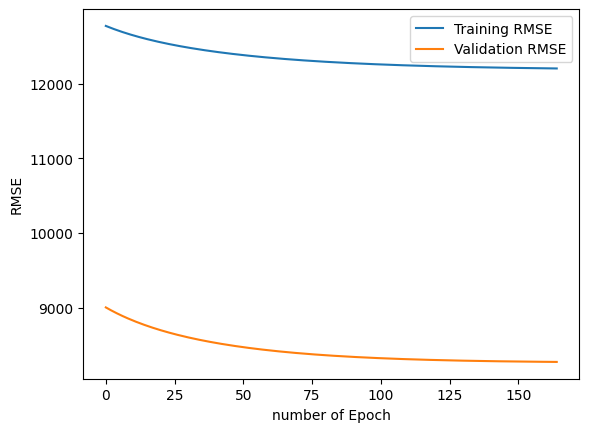

--- Total Training Time: 4.1463398933410645 (s) ---


In [ ]:
import time
import matplotlib.pyplot as plt
start_time = time.time() ## Records current time
np.random.seed(2)


w=(np.random.random(X_train_standardized.shape[1])/10000).reshape(1,-1) ### Inital weights
lr=0.01 ### Learning rate
threshold=1.001*RMSE_val

rmse_train_array=[]
rmse_val_array=[]
for epoch in range (0, 5000):
  y_pred_train=np.dot(X_train_standardized, w.T).reshape(-1,1)
  rmse_train_array.append(RMSE(y_pred_train, y_train))

  y_pred_val=np.dot(X_val_standardized, w.T).reshape(-1,1)
  rmse_val_array.append(RMSE(y_pred_val, y_val))


  gradient=(1/len(y_pred_train)*np.dot(X_train_standardized.T, y_pred_train-np.array(y_train).reshape(-1,1))).reshape(1,-1)

  w=w-lr*gradient ### weight update


  if RMSE(y_pred_val, y_val) <= threshold:
    break


plt.plot(rmse_train_array, label='Training RMSE')
plt.plot(rmse_val_array, label='Validation RMSE')
plt.xlabel("number of Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

# **Comment on overfitting/underfitting by observing the training and validation RMSE**

the model is underfitting as both training and validation RMSE are high

# **Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)**

An epoch refers to one complete pass through the entire training dataset.

An iteration refers to one update of the model's parameters.

The number of iterations in one epoch depends on the size of the mini-batches. For example, if we have 100 training examples and the batch size is 10. Then the one epoch would consist of 10 iterations.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
from sklearn.utils import shuffle
def mini_batch_gradient_decent(X_train, X_val, y_train, y_val, batch_size, lr, CT):
  start_time=time.time() ## Records current time

  w=(np.random.random(X_train_standardized.shape[1])/10000).reshape(1,-1) ### Inital weights
  total_size=X_train.shape[0]

  rmse_train_arr=[]
  rmse_val_arr=[]
  elapsed_time_arr=[]

  y_pred_train=np.dot(X_train, w.T).reshape(-1,1)
  y_pred_val=np.dot(X_val, w.T).reshape(-1,1)
  rmse_val=RMSE(y_pred_val, y_val)
  rmse_train_arr.append(RMSE(y_pred_train, y_train))
  rmse_val_arr.append(RMSE(y_pred_val, y_val))
  elapsed_time_arr.append(start_time-start_time)


  while rmse_val>CT:
    # shuffle the entire training set



    X_train, y_train=shuffle(X_train, np.array(y_train))



    for i in range(0, total_size, batch_size):
      batch=batch_size
      if i>total_size-batch_size:
        batch=total_size-i

      X_batch=X_train.iloc[i:i+batch, :]

      y_batch=y_train[i:i+batch]


      y_pred_val=np.dot(X_val, w.T).reshape(-1,1)

      y_pred_train_batch=np.dot(X_batch,w.T).reshape(-1,1)
      gradient=(1/len(y_pred_train_batch) * np.dot(X_batch.T, y_pred_train_batch-y_batch.reshape(-1,1))).reshape(1,-1)
      w=w-lr*gradient


    #print(X_train)
    y_pred_train=np.dot(X_train, w.T).reshape(-1,1)

    rmse_train_arr.append(RMSE(y_pred_train, y_train))

    y_pred_val=np.dot(X_val, w.T).reshape(-1,1)
    rmse_val=RMSE(y_pred_val, y_val)

    rmse_val_arr.append(rmse_val)

    elapsed_time_arr.append(time.time()-start_time)

    if len(rmse_val_arr)>1 and rmse_val>rmse_val_arr[-2]:
      print(f"the model diverges with batch size {batch_size}, the learning rate is {lr}")
      return w, rmse_train_arr, rmse_val_arr, elapsed_time_arr





  print(f"the model converges with batch size {batch_size}, the learning rate is {lr}")
  return w, rmse_train_arr, rmse_val_arr, elapsed_time_arr










In [ ]:
w_256, rmse_train_arr_256, rmse_val_arr_256, elapsed_time_arr_256=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 256, 0.01, threshold)
w_512, rmse_train_arr_512, rmse_val_arr_512, elapsed_time_arr_512=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 512, 0.01, threshold)
w_1024, rmse_train_arr_1024, rmse_val_arr_1024, elapsed_time_arr_1024=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 1024, 0.01, threshold)
w_2048, rmse_train_arr_2048, rmse_val_arr_2048, elapsed_time_arr_2048=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 2048, 0.01, threshold)
w_4096, rmse_train_arr_4096, rmse_val_arr_4096, elapsed_time_arr_4096=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 4096, 0.01, threshold)

the model converges with batch size 256, the learning rate is 0.01
the model converges with batch size 512, the learning rate is 0.01
the model converges with batch size 1024, the learning rate is 0.01
the model converges with batch size 2048, the learning rate is 0.01
the model converges with batch size 4096, the learning rate is 0.01


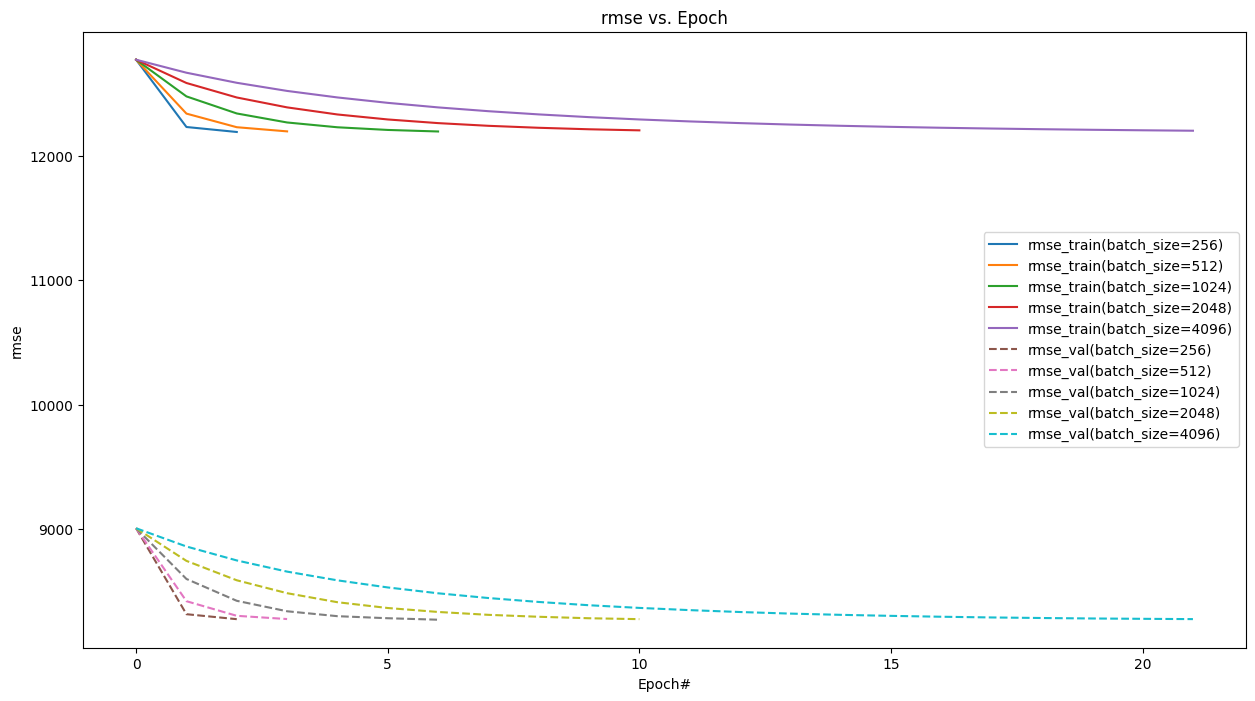

In [ ]:
plt.figure(figsize=(15, 8))

plt.title('rmse vs. Epoch')
plt.plot(rmse_train_arr_256,label='rmse_train(batch_size=256)')
plt.plot(rmse_train_arr_512,label='rmse_train(batch_size=512)')
plt.plot(rmse_train_arr_1024,label='rmse_train(batch_size=1024)')
plt.plot(rmse_train_arr_2048,label='rmse_train(batch_size=2048)')
plt.plot(rmse_train_arr_4096,label='rmse_train(batch_size=4096)')

plt.plot(rmse_val_arr_256,label='rmse_val(batch_size=256)', linestyle = 'dashed')
plt.plot(rmse_val_arr_512,label='rmse_val(batch_size=512)', linestyle = 'dashed')
plt.plot(rmse_val_arr_1024,label='rmse_val(batch_size=1024)', linestyle = 'dashed')
plt.plot(rmse_val_arr_2048,label='rmse_val(batch_size=2048)', linestyle = 'dashed')
plt.plot(rmse_val_arr_4096,label='rmse_val(batch_size=4096)', linestyle = 'dashed')
plt.legend()
plt.xlabel("Epoch#")
plt.ylabel("rmse")

plt.show()

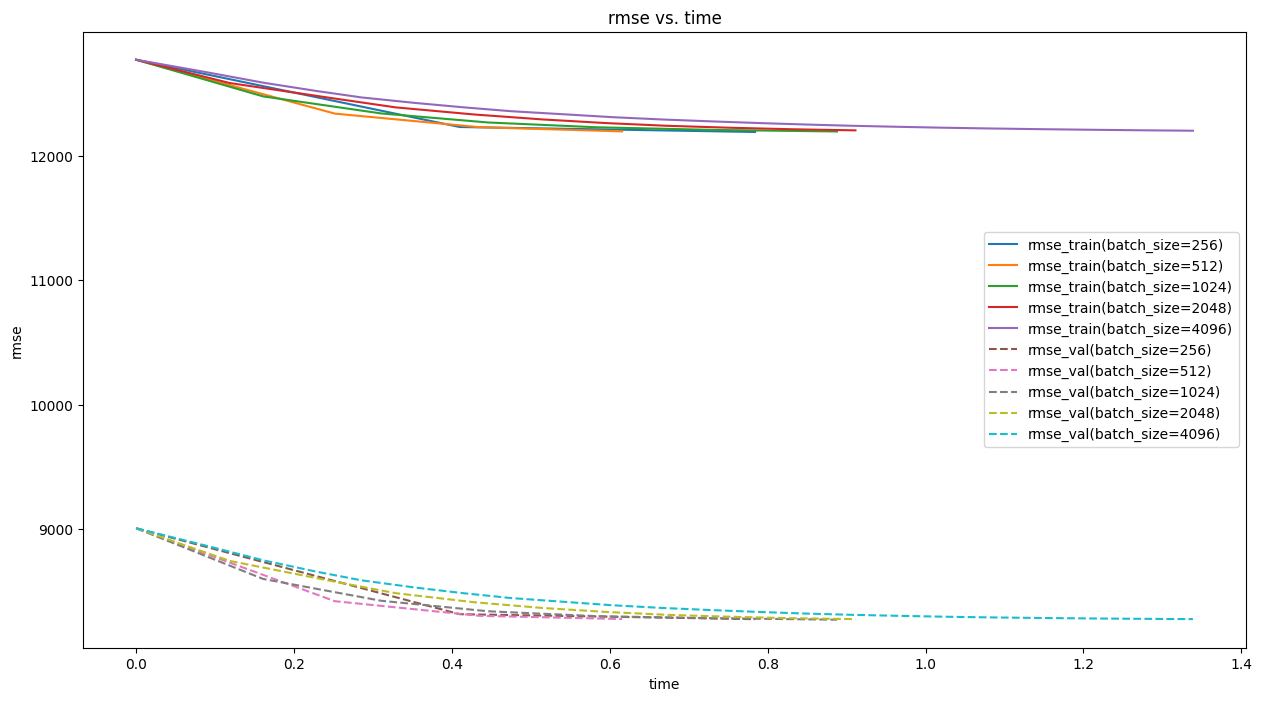

In [ ]:
plt.figure(figsize=(15,8))

plt.title('rmse vs. time')
plt.plot(elapsed_time_arr_256, rmse_train_arr_256,label='rmse_train(batch_size=256)')
plt.plot(elapsed_time_arr_512, rmse_train_arr_512,label='rmse_train(batch_size=512)')
plt.plot(elapsed_time_arr_1024, rmse_train_arr_1024,label='rmse_train(batch_size=1024)')
plt.plot(elapsed_time_arr_2048, rmse_train_arr_2048,label='rmse_train(batch_size=2048)')
plt.plot(elapsed_time_arr_4096, rmse_train_arr_4096,label='rmse_train(batch_size=4096)')

plt.plot(elapsed_time_arr_256, rmse_val_arr_256,label='rmse_val(batch_size=256)', linestyle = 'dashed')
plt.plot(elapsed_time_arr_512, rmse_val_arr_512,label='rmse_val(batch_size=512)', linestyle = 'dashed')
plt.plot(elapsed_time_arr_1024, rmse_val_arr_1024,label='rmse_val(batch_size=1024)', linestyle = 'dashed')
plt.plot(elapsed_time_arr_2048, rmse_val_arr_2048,label='rmse_val(batch_size=2048)', linestyle = 'dashed')
plt.plot(elapsed_time_arr_4096, rmse_val_arr_4096,label='rmse_val(batch_size=4096)', linestyle = 'dashed')
plt.legend()
plt.xlabel("time")
plt.ylabel("rmse")

plt.show()

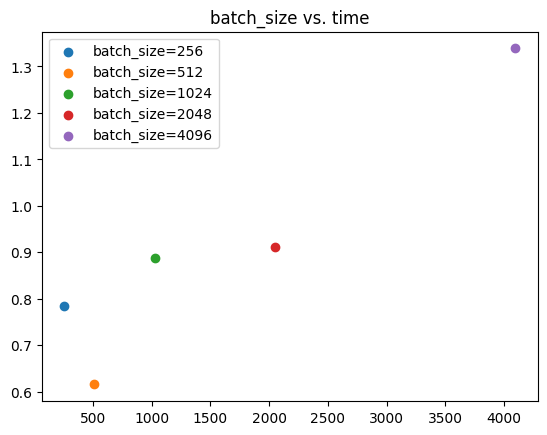

In [ ]:
plt.title('batch_size vs. time')

plt.scatter(256, elapsed_time_arr_256[-1],label='batch_size=256')
plt.scatter(512, elapsed_time_arr_512[-1],label='batch_size=512')
plt.scatter(1024, elapsed_time_arr_1024[-1],label='batch_size=1024')
plt.scatter(2048, elapsed_time_arr_2048[-1],label='batch_size=2048')
plt.scatter(4096, elapsed_time_arr_4096[-1],label='batch_size=4096')
plt.legend()
plt.show()

# **Describe your findings, including the main takeaways from each of your plots**

The more the batch size, the more number of epochs to converge.

There exists a local minimum in the batch size so that the time to converge is the fastest.



## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
w_32, rmse_train_arr_32, rmse_val_arr_32, elapsed_time_arr_32=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 32, 0.01, threshold)
w_16, rmse_train_arr_16, rmse_val_arr_16, elapsed_time_arr_16=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 16, 0.01, threshold)
w_8, rmse_train_arr_8, rmse_val_arr_8, elapsed_time_arr_8=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 8, 0.01, threshold)

the model diverges with batch size 32, the learning rate is 0.01
the model diverges with batch size 16, the learning rate is 0.01
the model diverges with batch size 8, the learning rate is 0.01


In [ ]:
lr_lst=[0.005, 0.001, 0.0005]
rmse_train_arr_arr_32=[]
rmse_val_arr_arr_32=[]

rmse_train_arr_arr_16=[]
rmse_val_arr_arr_16=[]

rmse_train_arr_arr_8=[]
rmse_val_arr_arr_8=[]

for lr in lr_lst:
  print(f"the learning rate is {lr}")
  w_32_tmp, rmse_train_arr_32_tmp, rmse_val_arr_32_tmp, elapsed_time_arr_32_tmp=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 32, lr, threshold)
  w_16_tmp, rmse_train_arr_16_tmp, rmse_val_arr_16_tmp, elapsed_time_arr_16_tmp=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 16, lr, threshold)
  w_8_tmp, rmse_train_arr_8_tmp, rmse_val_arr_8_tmp, elapsed_time_arr_8_tmp=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 8, lr, threshold)
  print("-------------------------------")
  rmse_train_arr_arr_32.append(rmse_train_arr_32_tmp)
  rmse_val_arr_arr_32.append(rmse_val_arr_32_tmp)

  rmse_train_arr_arr_16.append(rmse_train_arr_16_tmp)
  rmse_val_arr_arr_16.append(rmse_val_arr_16_tmp)

  rmse_train_arr_arr_8.append(rmse_train_arr_8_tmp)
  rmse_val_arr_arr_8.append(rmse_val_arr_8_tmp)




the learning rate is 0.005
the model diverges with batch size 32, the learning rate is 0.005
the model diverges with batch size 16, the learning rate is 0.005
the model diverges with batch size 8, the learning rate is 0.005
-------------------------------
the learning rate is 0.001
the model converges with batch size 32, the learning rate is 0.001
the model converges with batch size 16, the learning rate is 0.001
the model converges with batch size 8, the learning rate is 0.001
-------------------------------
the learning rate is 0.0005
the model converges with batch size 32, the learning rate is 0.0005
the model converges with batch size 16, the learning rate is 0.0005
the model converges with batch size 8, the learning rate is 0.0005
-------------------------------


In [ ]:

table=pd.DataFrame([8, 8, 8, 16, 16, 16, 32, 32, 32], columns=["Batch Size"])
table["Learning Rate"]=[0.005, 0.001, 0.0005, 0.005, 0.001, 0.0005, 0.005, 0.001, 0.0005]
table["RMSE_training"]=[rmse_train_arr_arr_8[0][-1], rmse_train_arr_arr_8[1][-1], rmse_train_arr_arr_8[2][-1],
               rmse_train_arr_arr_16[0][-1], rmse_train_arr_arr_16[1][-1], rmse_train_arr_arr_16[2][-1],
               rmse_train_arr_arr_32[0][-1], rmse_train_arr_arr_32[1][-1], rmse_train_arr_arr_32[2][-1]]
table["RMSE_validation"]=[rmse_val_arr_arr_8[0][-1], rmse_val_arr_arr_8[1][-1], rmse_val_arr_arr_8[2][-1],
               rmse_val_arr_arr_16[0][-1], rmse_val_arr_arr_16[1][-1], rmse_val_arr_arr_16[2][-1],
               rmse_val_arr_arr_32[0][-1], rmse_val_arr_arr_32[1][-1], rmse_val_arr_arr_32[2][-1]]

table["Converge?"]=['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
table

,Batch Size,Learning Rate,RMSE_training,RMSE_validation,Converge?
0,8,0.0050,14949.147120,9538.636582,No
1,8,0.0010,15528.225627,8263.238116,Yes
2,8,0.0005,12207.609782,8255.727936,Yes
3,16,0.0050,71292.141257,8429.879116,No
4,16,0.0010,12437.249422,8267.055447,Yes
5,16,0.0005,12195.745421,8263.004721,Yes
6,32,0.0050,18224.128044,8373.827681,No
7,32,0.0010,12197.077432,8272.412767,Yes
8,32,0.0005,12184.193485,8272.685223,Yes


In [ ]:
lr_lst_10=[0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0009, 0.0008, 0.0007, 0.0006]
rmse_train_arr_arr=[]
rmse_val_arr_arr=[]
elapsed_time_arr_arr=[]
for lr in lr_lst_10:
  w_final, rmse_train_arr_final, rmse_val_arr_final, elapsed_time_arr_final=mini_batch_gradient_decent(X_train_standardized, X_val_standardized, y_train, y_val, 512, lr, threshold)
  rmse_train_arr_arr.append(rmse_train_arr_final)
  rmse_val_arr_arr.append(rmse_val_arr_final)
  elapsed_time_arr_arr.append(elapsed_time_arr_final)



the model converges with batch size 512, the learning rate is 0.009
the model converges with batch size 512, the learning rate is 0.008
the model converges with batch size 512, the learning rate is 0.007
the model converges with batch size 512, the learning rate is 0.006
the model converges with batch size 512, the learning rate is 0.005
the model converges with batch size 512, the learning rate is 0.004
the model converges with batch size 512, the learning rate is 0.003
the model converges with batch size 512, the learning rate is 0.002
the model converges with batch size 512, the learning rate is 0.001
the model converges with batch size 512, the learning rate is 0.0009
the model converges with batch size 512, the learning rate is 0.0008
the model converges with batch size 512, the learning rate is 0.0007
the model converges with batch size 512, the learning rate is 0.0006


13


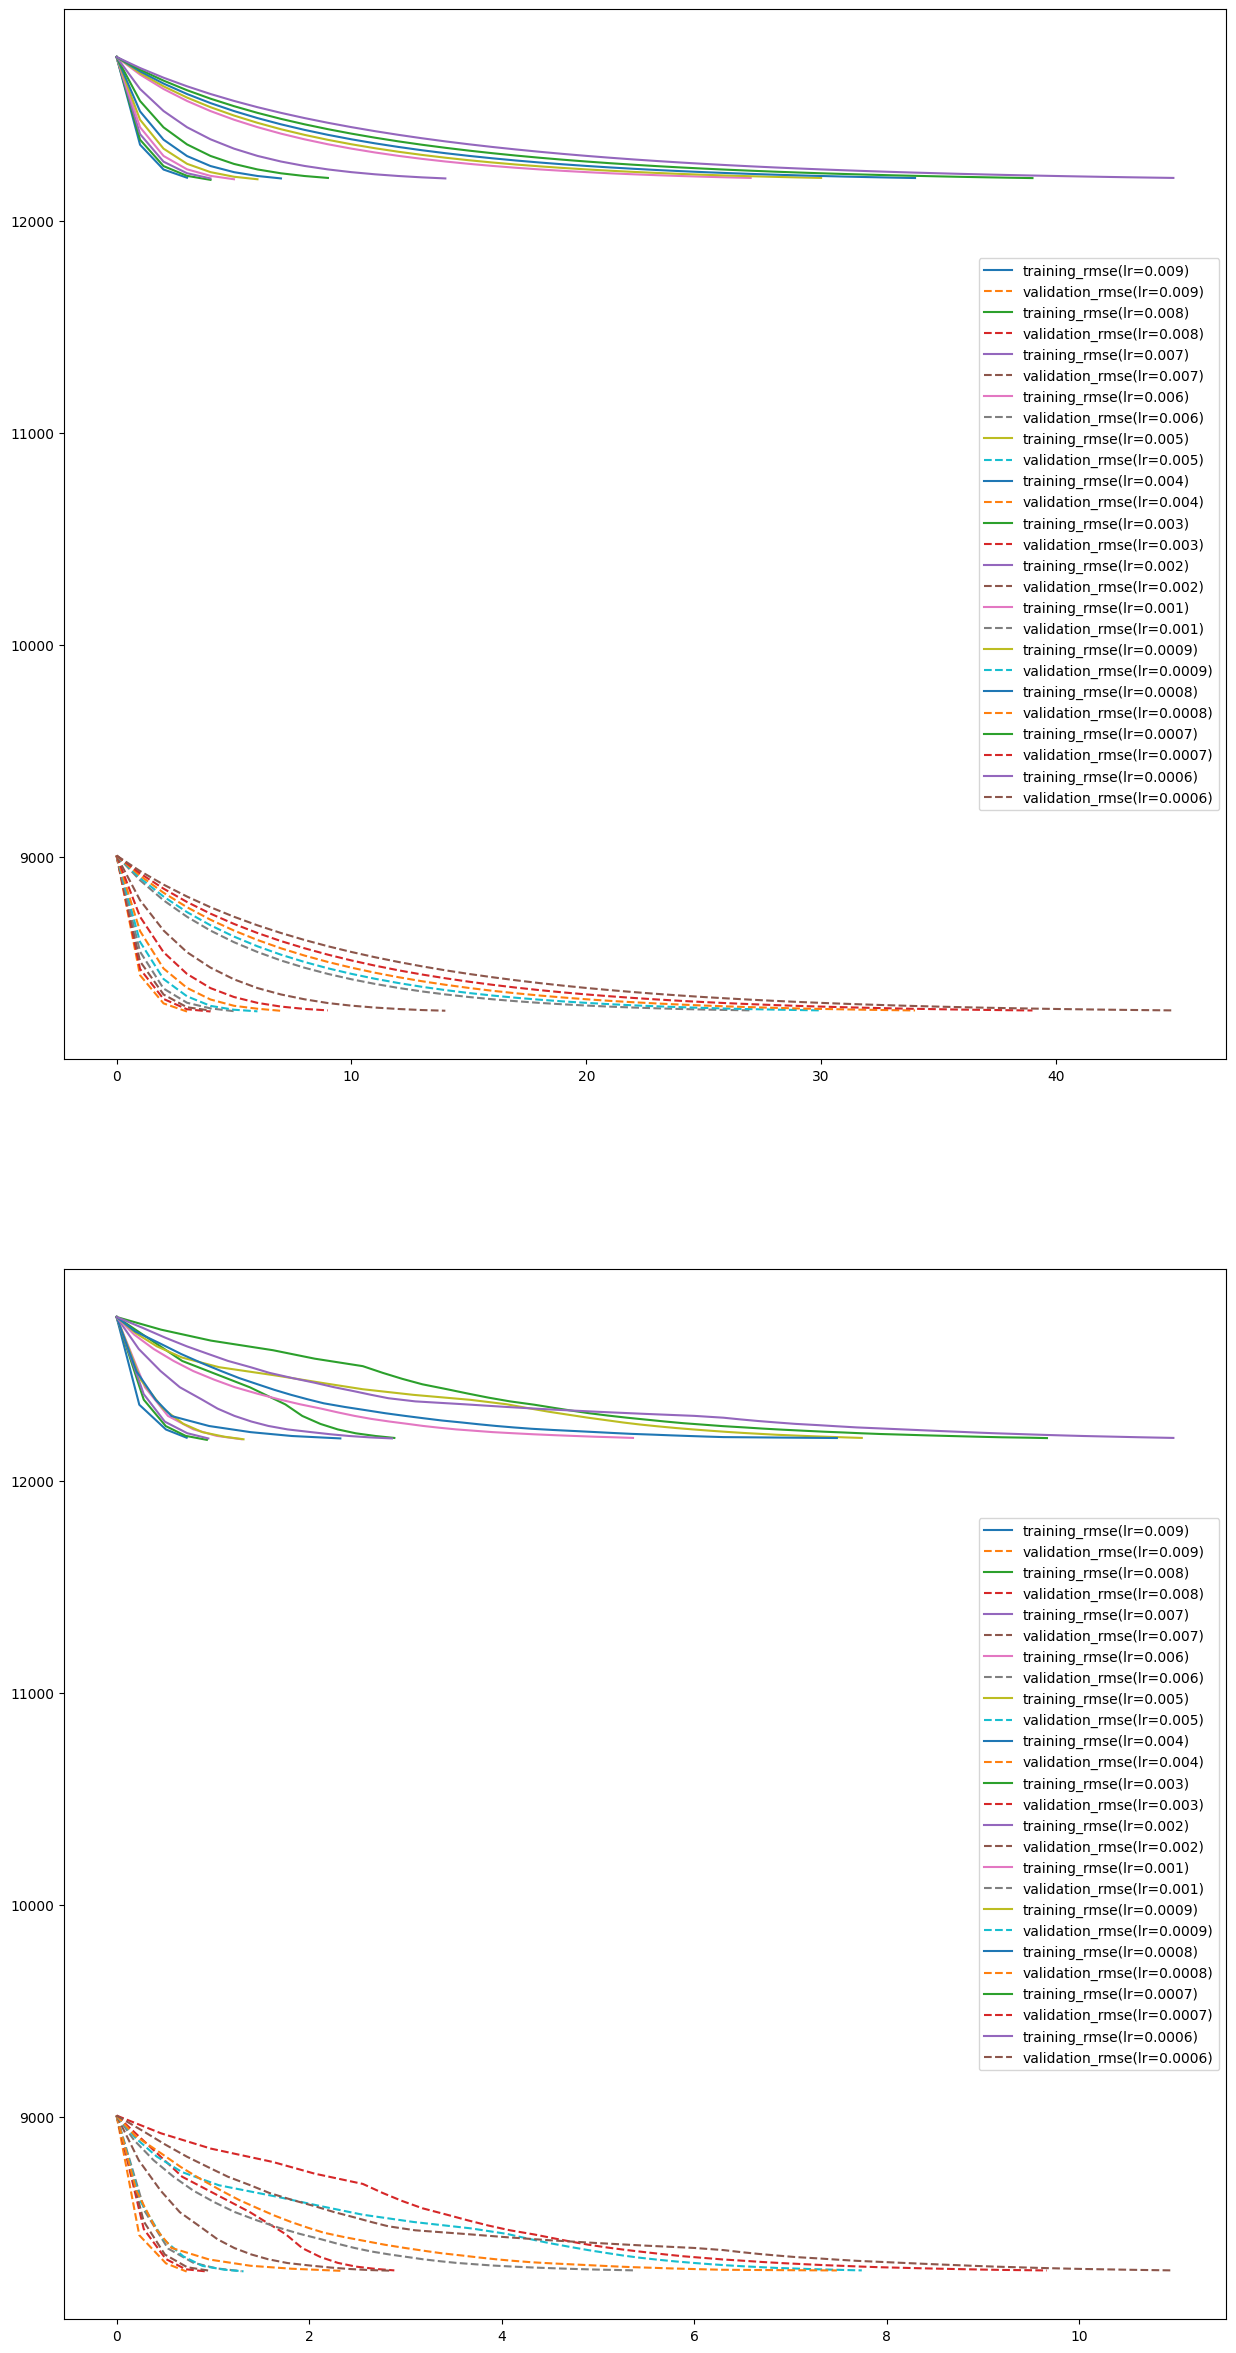

In [ ]:
fig, axes=plt.subplots(2, 1, figsize=(15, 30))
size=len(rmse_train_arr_arr)
print(size)
for i in range(size):
  axes[0].plot(rmse_train_arr_arr[i], label=f"training_rmse(lr={lr_lst_10[i]})")
  axes[0].plot(rmse_val_arr_arr[i], label=f"validation_rmse(lr={lr_lst_10[i]})", linestyle='dashed')

  axes[1].plot(elapsed_time_arr_arr[i], rmse_train_arr_arr[i], label=f"training_rmse(lr={lr_lst_10[i]})")
  axes[1].plot(elapsed_time_arr_arr[i], rmse_val_arr_arr[i], linestyle='dashed', label=f"validation_rmse(lr={lr_lst_10[i]})")

  axes[0].legend()
  axes[1].legend()

# **Describe your findings, including the main takeaways from each of your plots.**

The smaller the learning rate, the more time/number of epochs are required to converge.